In [1]:
# Import des bibliothèques nécessaires
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Chemins vers les fichiers
MODEL_PATH = "../models/final_model.keras"
TEST_DATA_PATH = "../data/processed/testing_data.npz"

In [3]:
# Étape 1 : Chargement du modèle
print("Chargement du modèle...")
model = load_model(MODEL_PATH)
print("Modèle chargé avec succès.")


Chargement du modèle...
Modèle chargé avec succès.


c:\Users\HP\Desktop\brain-tumor-classification\venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
# Étape 2 : Chargement des données de test
print("Chargement des données de test...")
data = np.load(TEST_DATA_PATH)
X_test = data['X']
y_test = data['y']
class_names = data['classes']

print(f"Nombre d'images de test : {len(X_test)}")
print(f"Classes : {class_names}")

Chargement des données de test...
Nombre d'images de test : 1311
Classes : ['glioma' 'meningioma' 'notumor' 'pituitary']


In [ ]:
# Normalisation des images (0-1)
# X_test = X_test / 255.0

In [7]:
# Étape 3 : Prédiction des classes
print("Prédiction en cours...")
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Classes prédites
y_true = y_test  # Classes réelles

Prédiction en cours...
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


In [8]:
# Étape 4 : Calcul des métriques de performance
accuracy = accuracy_score(y_true, y_pred)
print(f"Précision globale : {accuracy:.2f}")

Précision globale : 0.96


In [9]:
# Affichage du rapport de classification
print("Rapport de classification :")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

Rapport de classification :
              precision    recall  f1-score   support

      glioma       0.97      0.92      0.95       300
  meningioma       0.91      0.92      0.92       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.98      0.99      0.98       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



Affichage de la matrice de confusion...


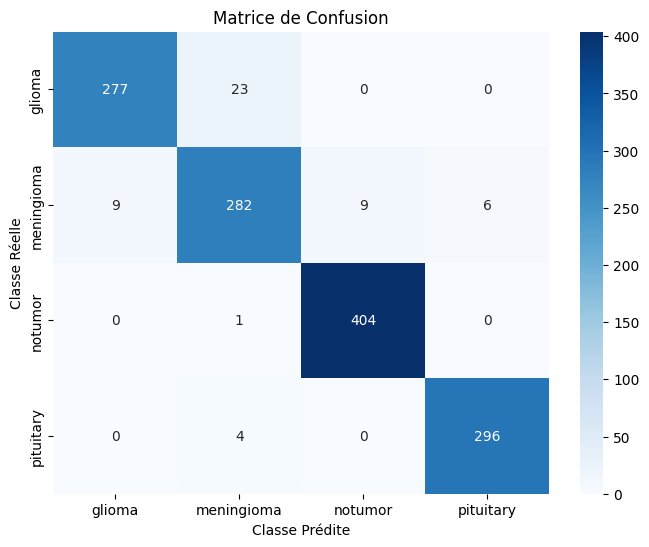

In [12]:
# Étape 5 : Matrice de confusion
print("Affichage de la matrice de confusion...")
conf_matrix = confusion_matrix(y_true, y_pred)

# Affichage avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.title('Matrice de Confusion')
plt.show()

In [13]:
# Étape 6 : Sauvegarde du rapport dans un fichier texte
REPORT_PATH = "../logs/evaluation_report.txt"
print(f"Sauvegarde du rapport dans {REPORT_PATH}...")
with open(REPORT_PATH, "w") as f:
    f.write("Rapport de Classification :\n")
    f.write(report)
    f.write(f"\nPrécision Globale : {accuracy:.2f}\n")

print("Évaluation terminée avec succès.")

Sauvegarde du rapport dans ../logs/evaluation_report.txt...
Évaluation terminée avec succès.
